Лабораторна робота №6
група МІТ-31
Квартюк Олексій
Мета:
Розробка та тренування нейронної мережі для класифікації рукописних цифр набору даних MNIST.

Завдання:

1) Завантажте набір даних MNIST:

Використовуйте TensorFlow або інші джерела для отримання набору даних.

2) Підготуйте дані для тренування:

Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.

3) Створіть нейронну мережу:

Розробіть нейронну мережу з використанням повнозвязних шарів.
Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.

4) Тренуйте модель:

Навчіть модель на тренувальному наборі даних.
Експериментуйте з різними оптимізаторами та іншими гіперпараметрами.
Оцініть ефективність моделі:

Використовуйте тестувальний набір даних для оцінки точності моделі.
Візуалізуйте деякі результати класифікації.
Примітки:
Зберігайте ваш код та результати, але не розміщуйте їх у відкритому доступі до моменту захисту.
Під час захисту викладіть ваші результати та код у репозиторій.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def visualizer(model_history):
  train_loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  epochs = range(1, len(train_loss) + 1)
  plt.plot(epochs, train_loss, 'g', label='Функція втрат на тренувальному наборі')
  plt.plot(epochs, val_loss, 'b', label='Функція втрат на тестувальному наборі')
  plt.xlabel('Епохи')
  plt.ylabel('Функція втрат')
  plt.legend()
  plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


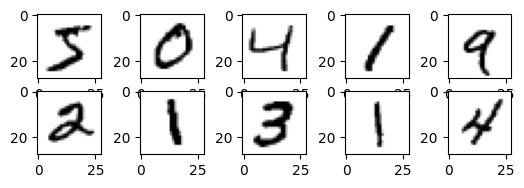

In [ ]:
for i in range(10):
  plt.subplot(5,5,1+i)
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.imshow(X_train[i], cmap = plt.cm.binary)

In [ ]:
# Нормалізація
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Перетворення вхідних данних у
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0], " - було\n", y_train_cat[0],  "- стало")

5  - було
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] - стало


In [ ]:
# Модель 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
print(model_1.summary())

model_1.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


313/313 [==============================] - 2s 5ms/step - loss: 0.0995 - accuracy: 0.9688


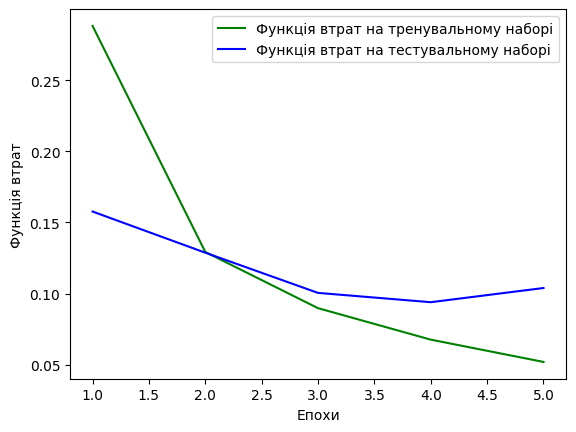

In [ ]:
history_1 = model_1.fit(X_train, y_train_cat, batch_size = 32, epochs = 5, validation_split=0.2, verbose=0)
model_1.evaluate(X_test, y_test_cat)
visualizer(history_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9805


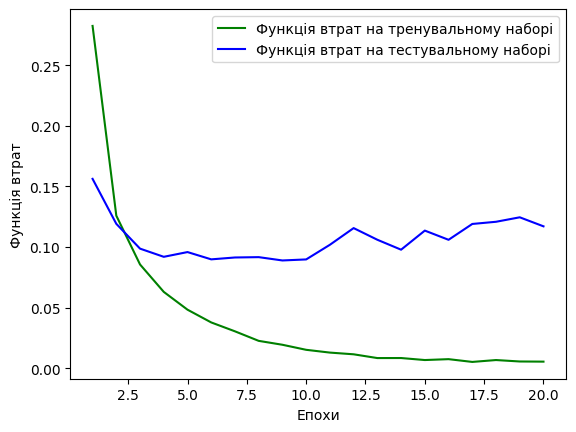

In [ ]:
history_2 = model_1_same.fit(X_train, y_train_cat, batch_size = 32, epochs = 20, validation_split=0.2, verbose=0)
model_1_same.evaluate(X_test, y_test_cat)
visualizer(history_2)

In [ ]:
# Модель 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
print(model_2.summary())

model_2.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9751


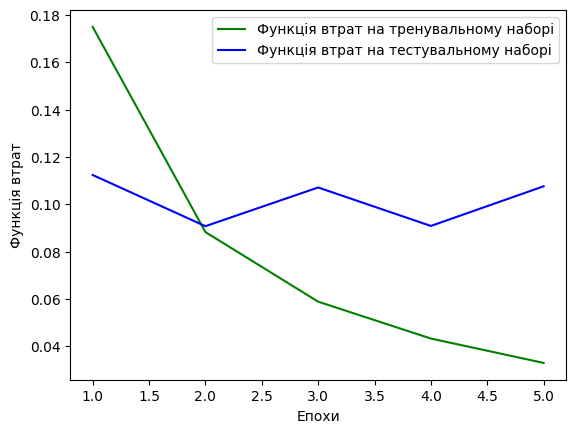

In [ ]:
history_1 = model_2.fit(X_train, y_train_cat, batch_size = 32, epochs = 5, validation_split=0.2, verbose=0)
model_2.evaluate(X_test, y_test_cat)
visualizer(history_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9790


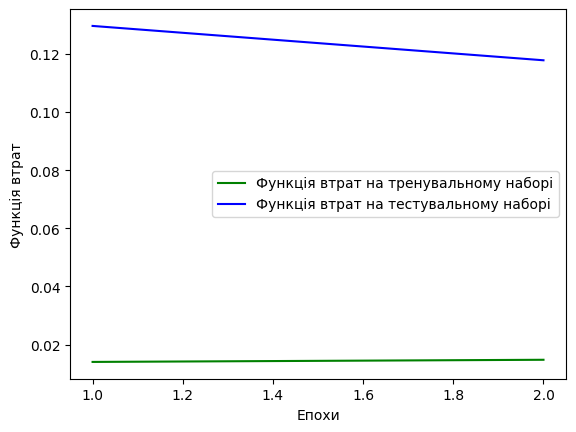

In [ ]:
history_1 = model_2.fit(X_train, y_train_cat, batch_size = 32, epochs = 2, validation_split=0.2, verbose=0)
model_2.evaluate(X_test, y_test_cat)
visualizer(history_1)

In [ ]:
# Модель 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
print(model_3.summary())

model_3.compile(optimizer='sgd',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


313/313 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9328


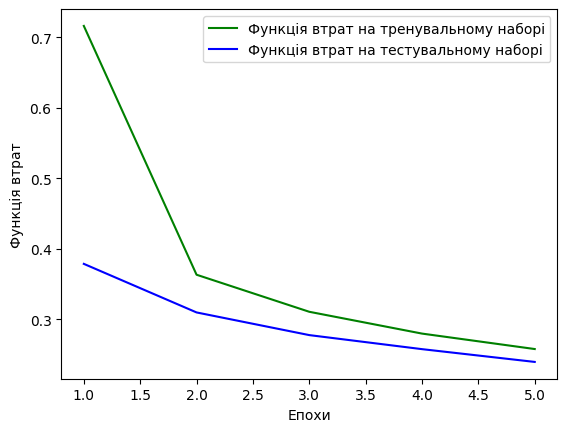

In [ ]:
history_1 = model_3.fit(X_train, y_train_cat, batch_size = 32, epochs = 5, validation_split=0.2, verbose=0)
model_3.evaluate(X_test, y_test_cat)
visualizer(history_1)

313/313 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9648


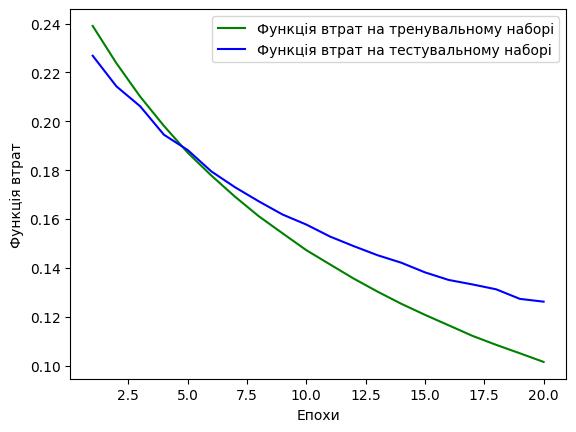

In [ ]:
history_1 = model_3.fit(X_train, y_train_cat, batch_size = 32, epochs = 20, validation_split=0.2, verbose=0)
model_3.evaluate(X_test, y_test_cat)
visualizer(history_1)